In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3 as sql3
import json
import sqlalchemy
import folium

In [2]:
mapa_rj = gpd.read_file("RJ.json")
db = pd.read_csv("atlas.csv")

# elimina uma coluna desnecessária repetida
mapa_rj = mapa_rj.drop(columns="description")

#seleciona as colunas que serão abordadas
db = db[['ano', 'município', 'idhm']]

# formata os nomes igualmente nas duas bases
mapa_rj['name'] = mapa_rj['name'].str.title()
db["município"] = db["município"].str.title()

In [3]:
# seleciona só os municípios do rio na base
municipios_rj = mapa_rj["name"].unique()
db_rj = db[db["município"].isin(municipios_rj)]

# seleciona um mapa por ano e descarta os 5 municípios repetidos
db_rj = db_rj.drop_duplicates(subset=['município', 'ano'])
db_rj_2010 = db_rj[db_rj["ano"] == 2010]
db_rj_2000 = db_rj[db_rj["ano"] == 2000]
db_rj_1991 = db_rj[db_rj["ano"] == 1991]

plot_rj_2010 = db_rj_2010.merge(mapa_rj, left_on="município", right_on="name")
plot_rj_2010 = gpd.GeoDataFrame(plot_rj_2010)

plot_rj_2000 = db_rj_2000.merge(mapa_rj, left_on="município", right_on="name")
plot_rj_2000 = gpd.GeoDataFrame(plot_rj_2000)

plot_rj_1991 = db_rj_1991.merge(mapa_rj, left_on="município", right_on="name")
plot_rj_1991 = gpd.GeoDataFrame(plot_rj_1991)

# Mapa do IDH dos municípios do Rio de Janeiro por ano
Use o seletor de camadas no topo esquerdo para selecionar o ano a ser mostrado.

In [4]:
map = plot_rj_2010.explore(column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 2010', # nome da camada
                    legend_kwds = {'caption':'Índice de Desenvolvimento Humano'}, # título da legenda
                    vmin=0, vmax=1 #define o mínimo e o máximo da escola
                    )
plot_rj_2000.explore(m = map,
                    column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 2000', # nome da camada
                    legend= False, #remove a legenda, já que o gráfico original já tem uma
                    vmin=0, vmax=1 #define o mínimo e o máximo da escola
                    )
plot_rj_1991.explore(m = map,
                    column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 1991', # nome da camada
                    legend= False, #remove a legenda, já que o gráfico original já tem uma
                    vmin=0, vmax=1 #define o mínimo e o máximo da escola
                    )


folium.LayerControl().add_to(map)  # Adiciona botão de controle de camadas
map

Versão estática do mapa, caso por algum motivo o de cima esteja muito difícil de rodar (mas saiba que ele é muito maneiro).

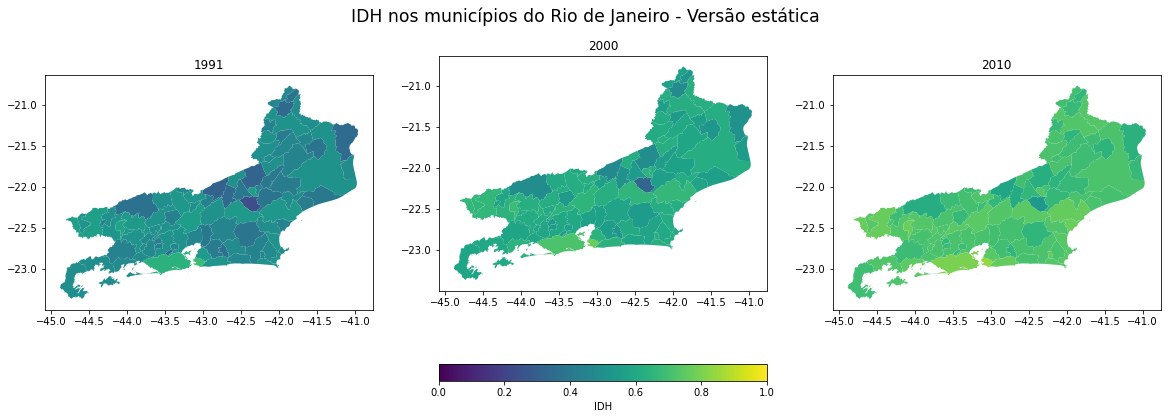

In [5]:
#versão estática do mapa

# base e título
fig, axes = plt.subplots(ncols=3, figsize=(20, 7))
fig.suptitle('IDH nos municípios do Rio de Janeiro - Versão estática', fontsize = 'xx-large')

# ano de 1991
ax0 = plot_rj_1991.plot(column= 'idhm', ax=axes[0], vmin=0, vmax=1)
ax0.set_title('1991')

# ano de 2000
ax1 = plot_rj_2000.plot(column= 'idhm', ax=axes[1], vmin=0, vmax=1,
                    legend= True, legend_kwds = {'label': 'IDH', 'orientation': "horizontal"}) # define a legenda
ax1.set_title('2000')

# ano de 2010
ax2 = plot_rj_2010.plot(column= 'idhm', ax=axes[2], vmin=0, vmax=1)
ax2.set_title('2010')

# reajusta a figura por conta do título
fig.subplots_adjust(top=1.1)

# Mapa do IDH dos municípios do Ceará por ano
Use o seletor de camadas no topo esquerdo para selecionar o ano a ser mostrado.

In [6]:
mapa_ce = gpd.read_file("CE.json")
db = pd.read_csv("atlas.csv")

# elimina uma coluna desnecessária repetida
mapa_ce = mapa_ce.drop(columns="description")

#seleciona as colunas que serão abordadas
db = db[['ano', 'município', 'idhm']]

# formata os nomes igualmente nas duas bases
mapa_ce['name'] = mapa_ce['name'].str.title()
db["município"] = db["município"].str.title()

In [7]:
# seleciona só os municípios do ceará na base
municipios_ce = mapa_ce["name"].unique()
db_ce = db[db["município"].isin(municipios_ce)]

# seleciona um mapa por ano e descarta os 5 municípios repetidos
db_ce = db_ce.drop_duplicates(subset=['município', 'ano'])
db_ce_2010 = db_ce[db_ce["ano"] == 2010]
db_ce_2000 = db_ce[db_ce["ano"] == 2000]
db_ce_1991 = db_ce[db_ce["ano"] == 1991]

plot_ce_2010 = db_ce_2010.merge(mapa_ce, left_on="município", right_on="name")
plot_ce_2010 = gpd.GeoDataFrame(plot_ce_2010)

plot_ce_2000 = db_ce_2000.merge(mapa_ce, left_on="município", right_on="name")
plot_ce_2000 = gpd.GeoDataFrame(plot_ce_2000)

plot_ce_1991 = db_ce_1991.merge(mapa_ce, left_on="município", right_on="name")
plot_ce_1991 = gpd.GeoDataFrame(plot_ce_1991)

In [8]:
map = plot_ce_2010.explore(column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 2010', # nome da camada
                    legend_kwds = {'caption':'Índice de Desenvolvimento Humano'}, # título da legenda
                    vmin=0, vmax=1 #define o mínimo e o máximo da escola
                    )
plot_ce_2000.explore(m = map,
                    column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 2000', # nome da camada
                    legend= False, #remove a legenda, já que o gráfico original já tem uma
                    vmin=0, vmax=1 #define o mínimo e o máximo da escola
                    )
plot_ce_1991.explore(m = map,
                    column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 1991', # nome da camada
                    legend= False, #remove a legenda, já que o gráfico original já tem uma
                    vmin=0, vmax=1 #define o mínimo e o máximo da escola
                    )


folium.LayerControl().add_to(map)  # Adiciona botão de controle de camadas
map

Versão estática do mapa, caso por algum motivo o de cima esteja muito difícil de rodar (mas saiba que ele é muito maneiro).

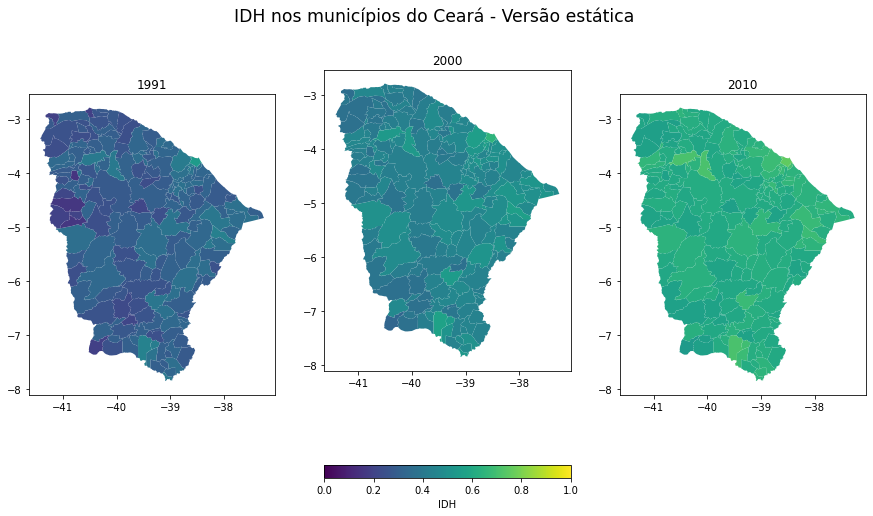

In [82]:
#versão estática do mapa

# base e título
fig, axes = plt.subplots(ncols=3, figsize=(15, 9))
fig.suptitle('IDH nos municípios do Ceará - Versão estática', fontsize = 'xx-large')

# ano de 1991
ax0 = plot_ce_1991.plot(column= 'idhm', ax=axes[0], vmin=0, vmax=1)
ax0.set_title('1991')

# ano de 2000
ax1 = plot_ce_2000.plot(column= 'idhm', ax=axes[1], vmin=0, vmax=1,
                    legend= True, legend_kwds = {'label': 'IDH', 'orientation': "horizontal"}) # define a legenda
ax1.set_title('2000')

# ano de 2010
ax2 = plot_ce_2010.plot(column= 'idhm', ax=axes[2], vmin=0, vmax=1)
ax2.set_title('2010')

# reajusta a figura por conta do título
fig.subplots_adjust(top=1.1)

# Comparando os IDH's do municípios do Rio e Ceará atualmente
É interessante comparar a diferença dos IDH's entre os municípios dos dois estados. Embora os melhores e piores IDH's de cada estado não distem tanto entre si (em especial o pior), é relevante notar que a média total dos municípios tem quase um ponto de diferença.

In [105]:
map = folium.Map(location=[-14, -40], zoom_start=5)

plot_rj_2010.explore(m = map,
                    column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 2010', # nome da camada
                    legend_kwds = {'caption':'Índice de Desenvolvimento Humano'}, # título da legenda
                    vmin=0, vmax=1 #define o mínimo e o máximo da escala
                    )

plot_ce_2010.explore(m = map,
                    column = 'idhm', # colore os municípios de acordo com o valor
                    tooltip=["município", "idhm"], # mostra os valores com 'hover'
                    name= 'IDH 2010', # nome da camada
                    legend = False, # legenda já definida
                    vmin=0, vmax=1 #define o mínimo e o máximo da escala
                    )



# ------ Marcações RJ
pior_rj = float(plot_rj_2010[["idhm"]].min())
melhor_rj = float(plot_rj_2010[["idhm"]].max())
media_rj = round( float(plot_rj_2010[["idhm"]].mean()), 3)

# Melhor IDH
mark_nit = folium.Marker([-22.921, -43.115],
                        tooltip = f'Melhor IDH do RJ: Niterói: { melhor_rj }',
                        icon=folium.Icon(color="green")).add_to(map)
# Pior IDH
mark_bmj = folium.Marker([-22.156, -42.442],
                        tooltip = f'Pior IDH do RJ: Bom Jardim: { pior_rj }',
                        icon=folium.Icon(color="red")).add_to(map)
# Círculo média
folium.Circle(
    location=[-22.321, -42.815],
    radius=250000,
    tooltip=f"Média do RJ: { media_rj }",
    fill = True).add_to(map)



# ------ Marcações Ceará
pior_ce = float(plot_ce_2010[["idhm"]].min())
melhor_ce = float(plot_ce_2010[["idhm"]].max())
media_ce = round( float(plot_ce_2010[["idhm"]].mean()), 3)

# Melhor IDH
mark_for = folium.Marker([-3.793, -38.589],
                        tooltip = f'Melhor IDH do CE: Fortaleza: { melhor_ce }',
                        icon=folium.Icon(color="green")).add_to(map)
# Pior IDH
mark_sal = folium.Marker([-7.283, -40.454],
                        tooltip = f'Pior IDH do CE: Salitre: { pior_ce }',
                        icon=folium.Icon(color="red")).add_to(map)
# C´riculo média
folium.Circle(
    location=[-5.293, -39.889],
    radius=300000,
    tooltip=f"Média do CE: { media_ce }",
    fill = True).add_to(map)

map